In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Relational Classification Plots on Synthetic Networks</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io
from utils import prediction
from utils import estimator

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-batch/"    # directory to store results
DATA = "../data/"               # data directory (networks)
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, '_mixed_effects')
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = Inference.get_summary(OUTPUT, kind, sampling=sampling, LC=LC, RC=RC, CI=CI, njobs=30, verbose=False)
df_results_original.shape

(62845, 27)

In [5]:
df_results_original.query("kind == 'BAH'").shape

(62445, 27)

In [6]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head() 

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,ccM,bias,lag,p\_{0},p\_{1},cp\_{00},cp\_{01},cp\_{11},cp\_{10},network\_{size}
0,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.70,...,1.0,0.5,645.406400,0.526012,0.473988,0.000217,0.999783,0.000217,0.999783,"N500, m20"
1,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.70,...,1.0,0.5,614.283562,0.488439,0.511561,0.000212,0.999788,0.000212,0.999788,"N500, m20"
2,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.05,...,1.0,0.5,1905.948831,0.592593,0.407407,0.047619,0.952381,0.047619,0.952381,"N500, m20"
3,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.05,...,1.0,0.5,1925.887763,0.629630,0.370370,0.062500,0.937500,0.062500,0.937500,"N500, m20"
4,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.30,...,1.0,0.5,1526.674176,0.560000,0.440000,0.001121,0.998879,0.001121,0.998879,"N500, m20"


<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [7]:
df_rq1 = df_results.query("kind=='BAH' & sampling=='nodes'")
df_rq1.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,ccM,bias,lag,p\_{0},p\_{1},cp\_{00},cp\_{01},cp\_{11},cp\_{10},network\_{size}
0,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.70,...,1.0,0.5,645.406400,0.526012,0.473988,0.000217,0.999783,0.000217,0.999783,"N500, m20"
1,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.70,...,1.0,0.5,614.283562,0.488439,0.511561,0.000212,0.999788,0.000212,0.999788,"N500, m20"
2,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.05,...,1.0,0.5,1905.948831,0.592593,0.407407,0.047619,0.952381,0.047619,0.952381,"N500, m20"
3,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.05,...,1.0,0.5,1925.887763,0.629630,0.370370,0.062500,0.937500,0.062500,0.937500,"N500, m20"
4,BAH,500,20,0.077592,0.5,0.0,5,5,nodes,0.30,...,1.0,0.5,1526.674176,0.560000,0.440000,0.001121,0.998879,0.001121,0.998879,"N500, m20"


<h3>Network structure vs. Global performance</h3>

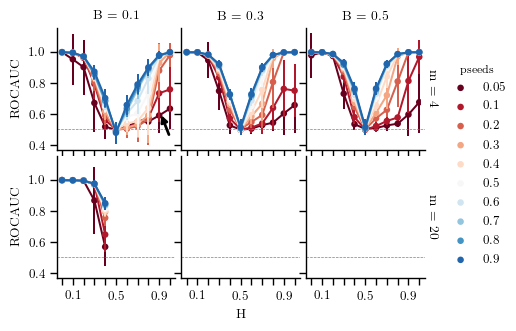

In [8]:
fn = None
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==2000"), columns, fn=fn)

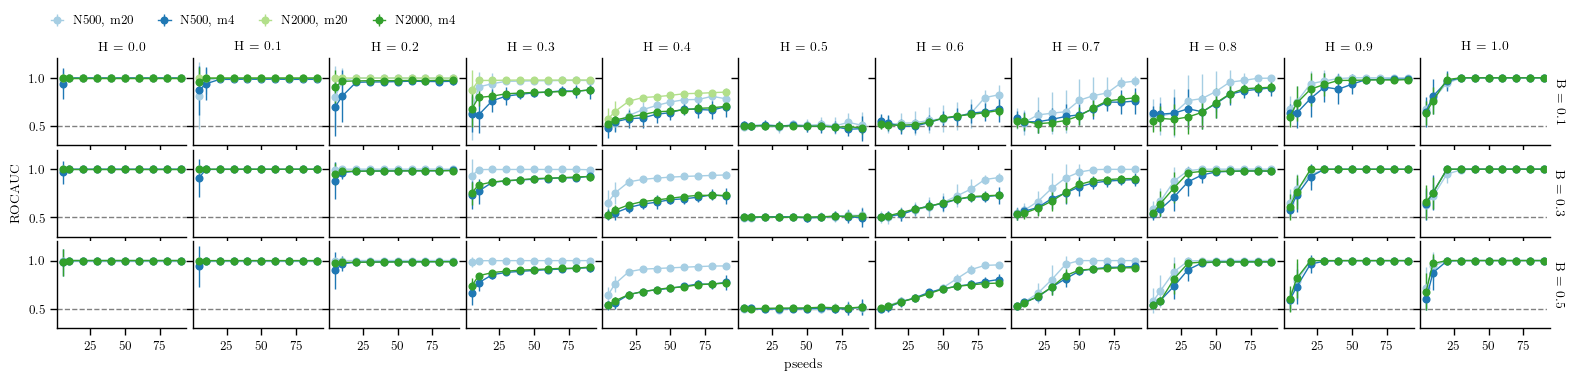

In [9]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [10]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"params.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/y_observed.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/fe_params.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/random_effects.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/mdf.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/params.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/X.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/Y.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/Z.pickle loaded!


In [11]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: rocauc   
No. Observations: 1620    Method:             REML     
No. Groups:       110     Scale:              0.0020   
Min. group size:  9       Likelihood:         2408.7235
Max. group size:  49      Converged:          Yes      
Mean group size:  14.7                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.776    0.018 44.043 0.000  0.742  0.811
N             0.000    0.000  6.656 0.000  0.000  0.000
density       0.580    0.046 12.716 0.000  0.490  0.669
B             0.085    0.007 12.275 0.000  0.071  0.099
Group Var     0.032    0.101                           
=======================================================

"""

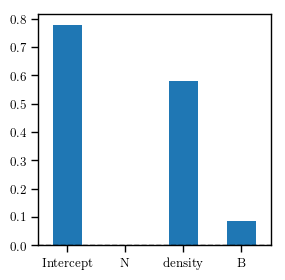

In [12]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

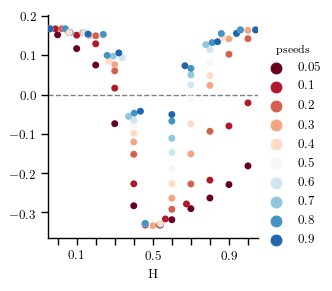

In [13]:
fn = None
viz.plot_random_effects(random_effects, params['group_vars'], fn)

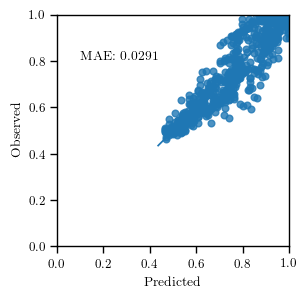

In [14]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

The MSE of LMM is 0.0018981181126793449
The RMSE of LMM is 0.04356739735948597
The MAE of LMM is 0.02914416109187196


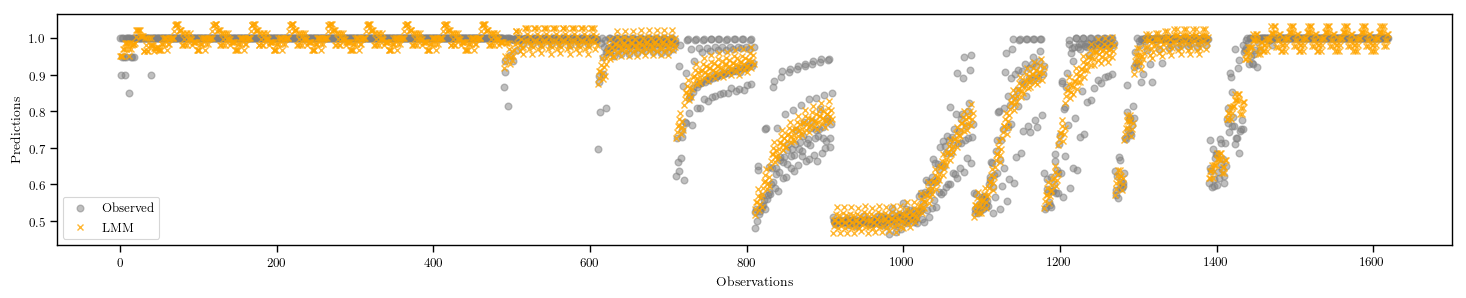

In [15]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Real World vs. Model</h3>

In [16]:
df_realworld = df_results.query("kind!='BAH' & sampling=='nodes'").copy()
df_realworld = prediction.setup(df_realworld)
df_realworld = df_realworld.append(prediction.predict_allrows(df_realworld, mdf, params), ignore_index=True)
df_realworld.sample(5)

,source,dataset,N,m,density,B,H,sampling,pseeds,ROCAUC,epoch
318,data,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.1,0.550090,9
722,model,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.2,0.558148,3
390,data,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.9,0.670507,1
191,data,Swarthmore42,1519,1,0.046600,0.49,0.53,nodes,0.9,0.740125,2
784,model,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.8,0.783212,5


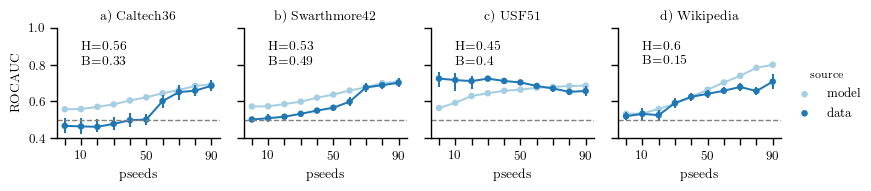

In [17]:
fn = None
viz.plot_model_vs_data(df_realworld, fn)

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [18]:
df_rq2 = df_results_original.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8]")
df_rq2 = estimator.merge_global_estimates(df_rq2, LC, RC, DATA, njobs=40)
df_rq2, columns = viz.latex_compatible_dataframe(df_rq2, LATEX) 
df_rq2.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,cp\_{00 g},cp\_{01 g},cp\_{10 g},cp\_{11 g},MSEp0,MSEp1,MSEcp00,MSEcp11,MSEcpDiff,MSE
0,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.70,...,0.497182,0.502818,0.502441,0.497559,0.000428,0.000428,0.000356,0.002418,-0.002063,0.003202
1,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.70,...,0.497182,0.502818,0.502441,0.497559,0.000428,0.000428,0.000356,0.002418,-0.002063,0.003202
2,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.05,...,0.497182,0.502818,0.502441,0.497559,0.003460,0.003460,0.003608,0.005720,-0.002112,0.012789
3,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.05,...,0.497182,0.502818,0.502441,0.497559,0.003460,0.003460,0.003608,0.005720,-0.002112,0.012789
4,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.30,...,0.497182,0.502818,0.502441,0.497559,0.001336,0.001336,0.002982,0.001598,0.001384,0.005916


<h3>Global performance</h3>

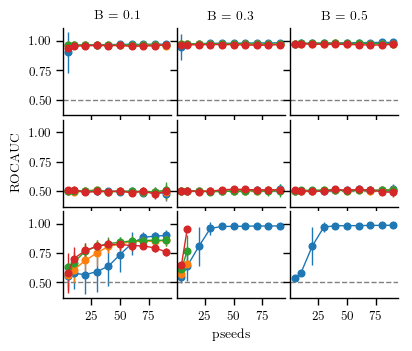

In [19]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_sampling(df_rq2, columns, fn=fn)

<h3>Quality of estimates</h3>

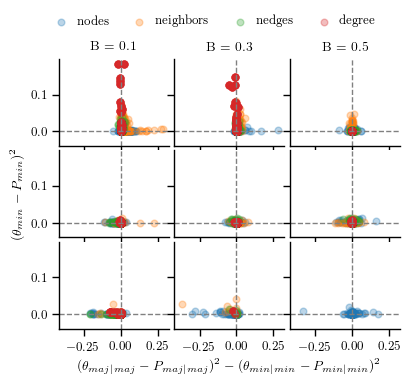

In [20]:
fn = None
viz.plot_MSEp1_vs_MSEcpDiff_per_H_B_sampling(df_rq2, columns, fn)

<h3>Utility of estimates</h3>

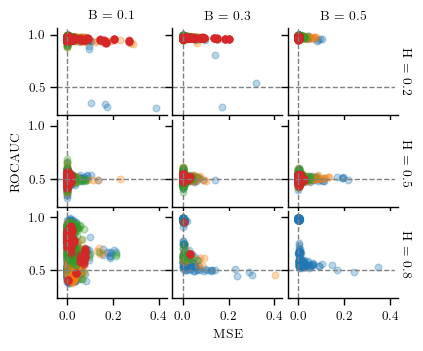

In [21]:
fn = None
viz.plot_rocauc_vs_MSE_per_H_B_sampling(df_rq2, columns, fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [22]:
df_rq3 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8] and pseeds < .4")
df_rq3.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,ccM,bias,lag,p\_{0},p\_{1},cp\_{00},cp\_{01},cp\_{11},cp\_{10},network\_{size}
202,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.05,...,0.565678,0.456379,1874.650560,0.558824,0.441176,0.557252,0.442748,0.421927,0.578073,"N2000, m4"
203,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.05,...,0.567797,0.427903,1875.457276,0.558824,0.441176,0.557252,0.442748,0.421927,0.578073,"N2000, m4"
204,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.30,...,0.535398,0.455213,1182.271003,0.536545,0.463455,0.551791,0.448209,0.457587,0.542413,"N2000, m4"
205,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.20,...,0.538755,0.469729,1407.362747,0.532338,0.467662,0.545936,0.454064,0.437226,0.562774,"N2000, m4"
207,BAH,2000,4,0.003994,0.5,0.5,1,5,degree,0.05,...,0.557203,0.437315,1822.784187,0.558824,0.441176,0.557252,0.442748,0.421927,0.578073,"N2000, m4"


<h3>Performance Bias</h3>

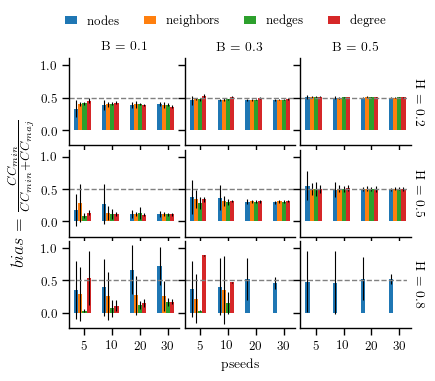

In [23]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)